<a href="https://colab.research.google.com/github/aniruddhajoshi31/Supervised-Sunspot-Time-Series/blob/main/sunspot_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the sunspots dataset directly from the library
from statsmodels.datasets import sunspots
data = sunspots.load_pandas().data
data.set_index("YEAR", inplace=True)

In [5]:
# Convert time series to supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

values = data.values
data_supervised = series_to_supervised(values, 12, 1)



In [6]:
# Split into input and output columns
X, y = data_supervised.iloc[:, :-1], data_supervised.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
index_train, index_test = X_train.index, X_test.index




In [7]:
# Fit RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=1)

In [8]:
# Predict
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)



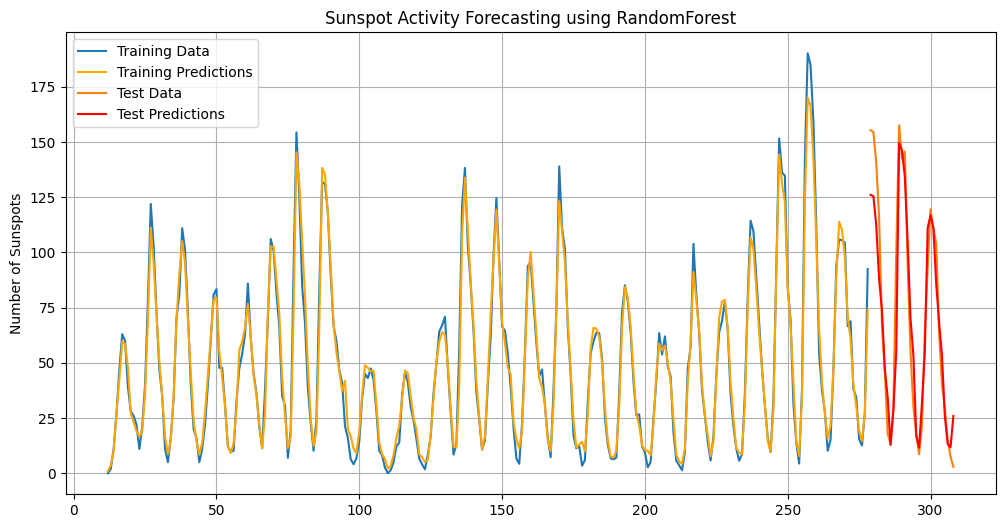

In [9]:
# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(index_train, y_train, label="Training Data")
plt.plot(index_train, y_pred_train, label="Training Predictions", color="orange")
plt.plot(index_test, y_test, label="Test Data")
plt.plot(index_test, y_pred_test, label="Test Predictions", color="red")
plt.legend()
plt.title("Sunspot Activity Forecasting using RandomForest")
plt.ylabel("Number of Sunspots")
plt.grid(True)
plt.show()



In [10]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error for the forecast: {mse}")

Mean Squared Error for the forecast: 278.7252514
